In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('Netflix Userbase.csv')

In [34]:
# show first 5 rows
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [27]:
# show last 5 rows
df.tail()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month
2499,2500,Basic,15,13-08-22,12-07-23,United States,35,Female,Smart TV,1 Month


In [28]:
# Dstaset shape(rows,columns)
df.shape

(2500, 10)

In [36]:
# Getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [87]:
# recast data type to datetime
df['Join Date'] = df['Join Date'].astype('datetime64[ns]')
df['Last Payment Date'] = df['Last Payment Date'].astype('datetime64[ns]')

In [75]:
# another way
# df['Join Date'] = pd.to_datetime(df['Join Date'])
# df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

In [88]:
df['Join Date'].dtype

dtype('<M8[ns]')

In [31]:
# check duplicated rows
print(df.duplicated().any())

False


In [39]:
# get overall statistics
df[['Monthly Revenue','Age']].describe()

,Monthly Revenue,Age
count,2500.000000,2500.000000
mean,12.508400,38.795600
std,1.686851,7.171778
min,10.000000,26.000000
25%,11.000000,32.000000
50%,12.000000,39.000000
75%,14.000000,45.000000
max,15.000000,51.000000


In [38]:
# categorical data info
df.describe(include="O")

,Subscription Type,Join Date,Last Payment Date,Country,Gender,Device,Plan Duration
count,2500,2500,2500,2500,2500,2500,2500
unique,3,300,26,10,2,4,1
top,Basic,05-11-22,28-06-23,United States,Female,Laptop,1 Month
freq,999,33,164,451,1257,636,2500


Text(0.5, 1.0, 'Age')

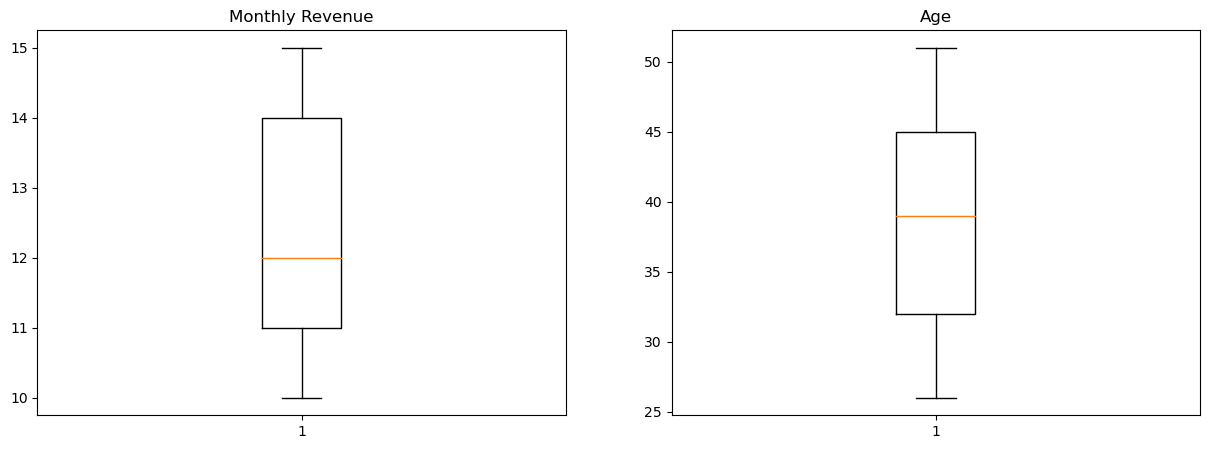

In [42]:
# check outliers
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].boxplot(df['Monthly Revenue'])
ax[0].set_title("Monthly Revenue")
ax[1].boxplot(df['Age'])
ax[1].set_title("Age")

In [51]:
# The most frequent subscribers age
df['Age'].value_counts().idxmax()

39

In [52]:
# The number of subscribers in each Subscription Type
df['Subscription Type'].value_counts()

Basic       999
Standard    768
Premium     733
Name: Subscription Type, dtype: int64

In [53]:
# The number of subscribers of both genders(Male, Female)
df['Gender'].value_counts()

Female    1257
Male      1243
Name: Gender, dtype: int64

In [54]:
# The country with the most subscribers 
df['Country'].value_counts().idxmax()

'United States'

In [55]:
# The country with the least number of subscribers 
df['Country'].value_counts().idxmin()

'United Kingdom'

In [73]:
# The last subscription date
df['Join Date'].max()

Timestamp('2023-12-01 00:00:00')

In [74]:
# The first subscription date
df['Join Date'].min()

Timestamp('2021-05-09 00:00:00')

In [89]:
# The most device is used
df['Device'].value_counts().idxmax()

'Laptop'